# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys01 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # pause for a second using time.sleep() - avoids blowing out the API key
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shache
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | artyk
City not found. Skipping...
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | ponta delgada
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | bambanglipuro
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | najran
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | inirida
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | manavalakurichi
Processing Record 20 of Set 1 | salym
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | swan river
Processing

Processing Record 40 of Set 4 | gobabis
Processing Record 41 of Set 4 | komsomolskiy
Processing Record 42 of Set 4 | dandong
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | ambilobe
Processing Record 46 of Set 4 | bhatkal
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | sumen
City not found. Skipping...
Processing Record 0 of Set 5 | altay
Processing Record 1 of Set 5 | maragogi
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | port hardy
Processing Record 4 of Set 5 | tazovskiy
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | bara
Processing Record 7 of Set 5 | pangnirtung
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | port hedland
Processing Record 11 of Set 5 | alofi
Processing Record 12 of Set 5 | rawson
Pro

Processing Record 30 of Set 8 | rio gallegos
Processing Record 31 of Set 8 | lumut
Processing Record 32 of Set 8 | mahaicony
City not found. Skipping...
Processing Record 33 of Set 8 | north las vegas
Processing Record 34 of Set 8 | paamiut
Processing Record 35 of Set 8 | ahuimanu
Processing Record 36 of Set 8 | conde
Processing Record 37 of Set 8 | visnes
Processing Record 38 of Set 8 | vicuna
Processing Record 39 of Set 8 | sorland
Processing Record 40 of Set 8 | helong
Processing Record 41 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 42 of Set 8 | ryotsu
Processing Record 43 of Set 8 | faanui
Processing Record 44 of Set 8 | mahajanga
Processing Record 45 of Set 8 | qaqortoq
Processing Record 46 of Set 8 | praia
Processing Record 47 of Set 8 | timiryazevskiy
Processing Record 48 of Set 8 | bouloupari
Processing Record 49 of Set 8 | manokwari
Processing Record 0 of Set 9 | ouesso
Processing Record 1 of Set 9 | belmonte
Processing Record 2 of Set 9 | nur

Processing Record 13 of Set 12 | lohne
Processing Record 14 of Set 12 | matara
Processing Record 15 of Set 12 | svetlaya
Processing Record 16 of Set 12 | kijabe
Processing Record 17 of Set 12 | cururupu
Processing Record 18 of Set 12 | san quintin
Processing Record 19 of Set 12 | kendari
Processing Record 20 of Set 12 | farafangana
Processing Record 21 of Set 12 | bandarbeyla
Processing Record 22 of Set 12 | vao
Processing Record 23 of Set 12 | tazmalt
Processing Record 24 of Set 12 | saint george
Processing Record 25 of Set 12 | kihei
Processing Record 26 of Set 12 | pahrump
Processing Record 27 of Set 12 | puerto maldonado
Processing Record 28 of Set 12 | shimoda
Processing Record 29 of Set 12 | grand centre
City not found. Skipping...
Processing Record 30 of Set 12 | winchester
Processing Record 31 of Set 12 | saint-alexandre
Processing Record 32 of Set 12 | durango
Processing Record 33 of Set 12 | bilma
Processing Record 34 of Set 12 | sistranda
Processing Record 35 of Set 12 | bey

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shache,38.4167,77.2406,50.92,24,5,4.61,CN,1679185395
1,ushuaia,-54.8000,-68.3000,46.06,76,75,10.36,AR,1679185399
2,codrington,-38.2667,141.9667,61.12,65,100,6.96,AU,1679185401
3,ponta delgada,37.7333,-25.6667,61.52,88,75,11.50,PT,1679184879
4,jamestown,42.0970,-79.2353,22.59,97,100,20.71,US,1679185256


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shache,38.4167,77.2406,50.92,24,5,4.61,CN,1679185395
1,ushuaia,-54.8000,-68.3000,46.06,76,75,10.36,AR,1679185399
2,codrington,-38.2667,141.9667,61.12,65,100,6.96,AU,1679185401
3,ponta delgada,37.7333,-25.6667,61.52,88,75,11.50,PT,1679184879
4,jamestown,42.0970,-79.2353,22.59,97,100,20.71,US,1679185256


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

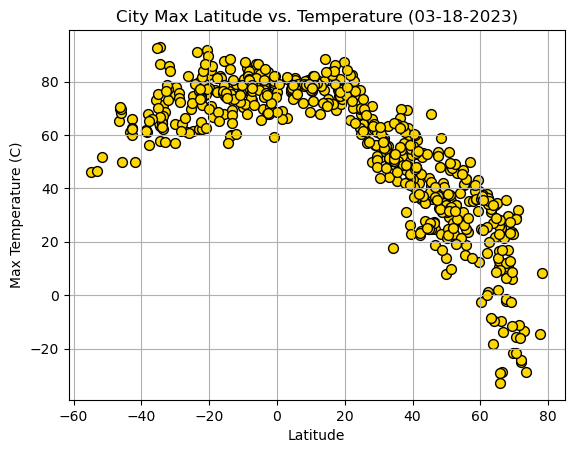

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="gold",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

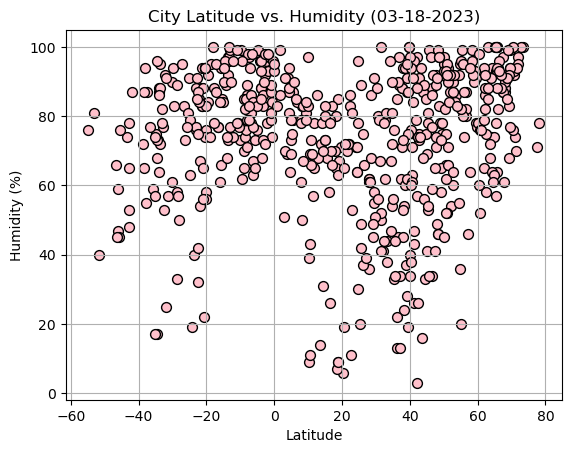

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="pink",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

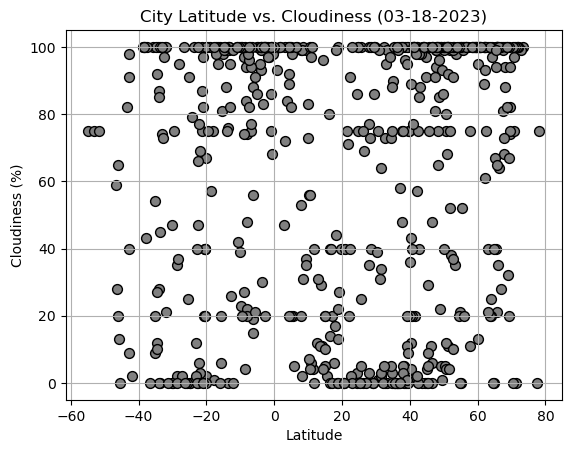

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

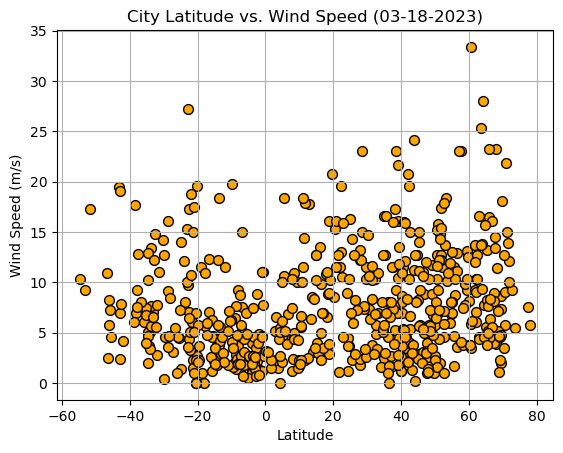

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    color="orange",
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shache,38.4167,77.2406,50.92,24,5,4.61,CN,1679185395
3,ponta delgada,37.7333,-25.6667,61.52,88,75,11.50,PT,1679184879
4,jamestown,42.0970,-79.2353,22.59,97,100,20.71,US,1679185256
8,najran,17.4924,44.1277,69.40,66,6,3.31,SA,1679184854
11,inirida,3.8653,-67.9239,80.98,69,84,1.50,CO,1679185412


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,46.06,76,75,10.36,AR,1679185399
2,codrington,-38.2667,141.9667,61.12,65,100,6.96,AU,1679185401
5,chuy,-33.6971,-53.4616,71.11,95,45,6.49,UY,1679184931
6,bambanglipuro,-7.9500,110.2833,78.24,86,74,3.69,ID,1679184967
7,karratha,-20.7377,116.8463,91.85,22,20,3.04,AU,1679184862


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7717847612650822


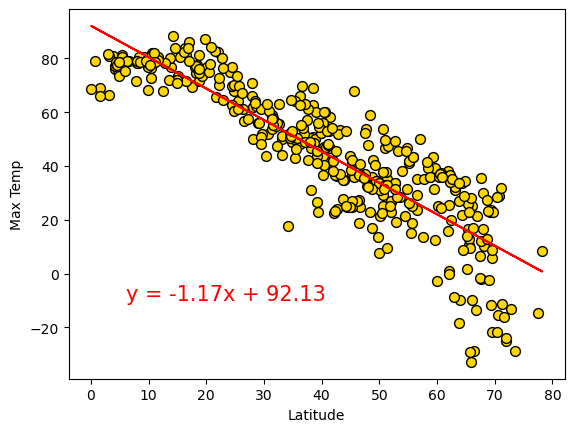

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10), "gold")

The r-value is: 0.23860687376369305


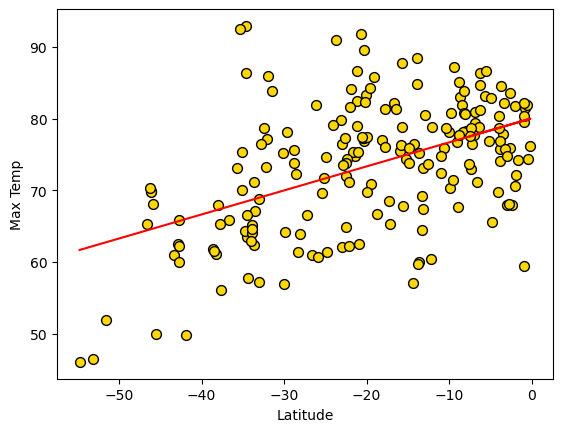

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35), "gold")

**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07922107415175668


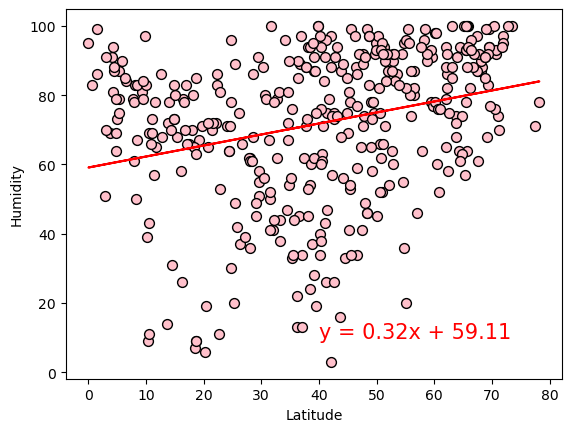

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10), "pink")

The r-value is: 0.1576620252124953


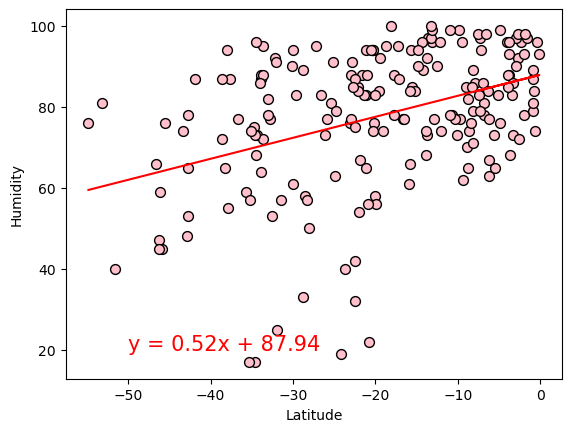

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20), "pink")

**Discussion about the linear relationship:** The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05315016370305509


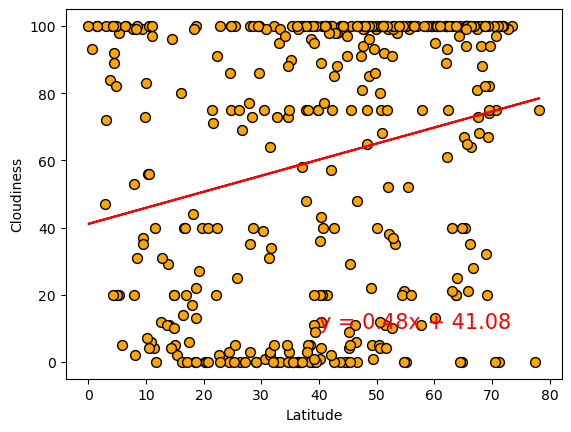

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10), "orange")

The r-value is: 0.0848204336101766


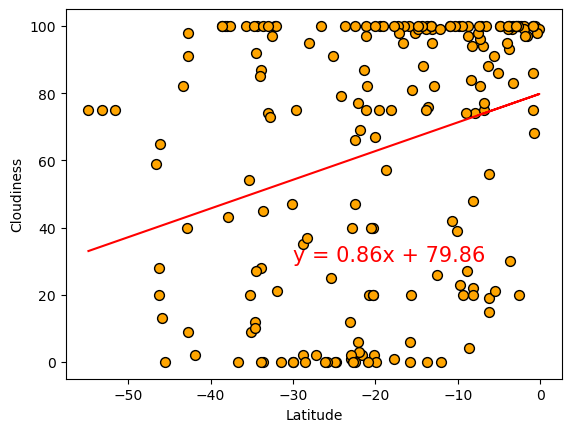

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30), "orange")

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02368109487403839


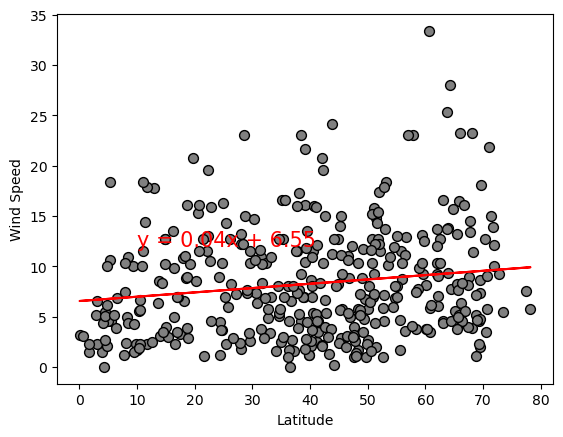

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12), "gray")

The r-value is: 0.11617426501101463


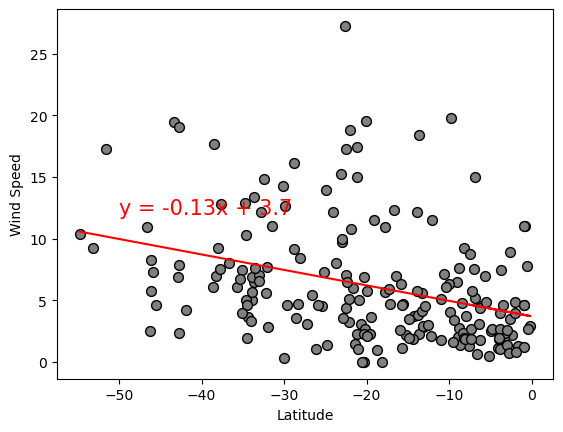

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12), "gray")

**Discussion about the linear relationship:** The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.